## 今天的範例，帶大家運用python 裡面的套件
* 如何模擬這些分配的樣本點
* 進行一些機率的運算

包含以下離散型分配        


4. 負二項分配(Negative Binomial Distribution)  
5. 超幾何分配(Hypergeometric Distribution)  

In [16]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics

### 4. 負二項分配(Negative Binomial Distribution)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[0.064      0.1152     0.13824    0.13824    0.124416   0.10450944
 0.08360755 0.06449725 0.04837294 0.03547349 0.02554091 0.01811083
 0.01267758 0.00877679 0.00601837]
<class 'numpy.ndarray'>


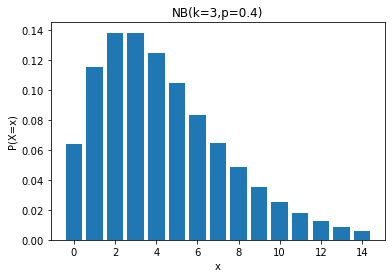

In [32]:
'''
# 負二項分配(Negative Binomial Distribution)
# 前提：在一系列獨立同分布的伯努利試驗中，X為成功次數到達指定次數（記為 𝑘 ）時，需要試驗的次數的機率分布
p: 成功的機率
k: 累積到 k 次成功後才停整
r: 產生出 樣本點空間
'''
# 1.定義負二項分配的基本資訊
p = 0.4 #成功的機率
k = 3   #指定次數

#產生一個同樣間隔的序列
#print(stats.nbinom.ppf(0.01, k, p)) #0.0
#print(stats.nbinom.ppf(0.99, k, p)) #15

r = np.arange(stats.nbinom.ppf(0.01, k,p),
              stats.nbinom.ppf(0.99, k,p))
print(r)

# 2.計算機率質量函數 (probability mass function)
# P(X=x) --> 是機率
probs = stats.nbinom.pmf(r,k,p)
print(probs)
print(type(probs))

plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('NB(k=3,p=0.4)')
plt.show()


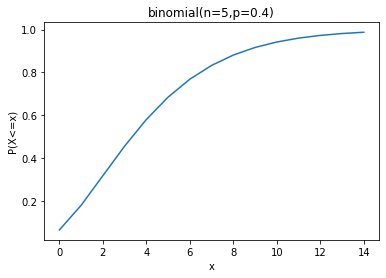

In [33]:
# 3.計算負二項分佈的累積機率 (cumulative density function)，pmf 的累加
# P(X=x) --> 是機率
cumsum_probs = stats.nbinom.cdf(r, k, p)
#array([ 0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])
plt.show()
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('binomial(n=5,p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

In [34]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
p_loc= stats.nbinom.ppf(cumsum_probs, k, p)
print(p_loc)
#看上圖看結果

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


[ 1  5  0  8  3 15  4 11  2  6  5  1 11  2  7 15  7  4  6 12]


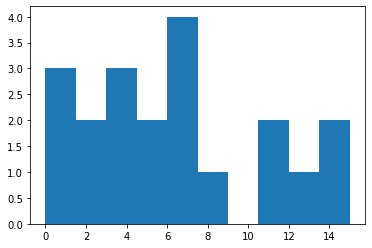

In [35]:
# 5.產生符合負二項分佈的隨機樣本點 (random sample)
X = stats.nbinom.rvs(k,p,size=20)
print(X)
plt.hist(X)
plt.show()
#試試看，，每一次的結果一樣嗎?

In [36]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_nbin=stats.nbinom.stats(k,p,moments='mvks')
print(stat_nbin)
print(type(stat_nbin))
#E(X)
print("negative binomial mean=",float(stat_nbin[0]))
print("negative binomial variance=",float(stat_nbin[1]))
print("negative binomial kurtosis=",float(stat_nbin[2]))
print("negative binomial skew=",float(stat_nbin[3]))

(array(4.5), array(11.25), array(1.19256959), array(2.08888889))
<class 'tuple'>
negative binomial mean= 4.5
negative binomial variance= 11.25
negative binomial kurtosis= 1.1925695879998879
negative binomial skew= 2.088888888888889


### 5. 超幾何分配(Hypergeometric Distribution)

[ 0  1  2  3  4  5  6  7  8  9 10]
[1.79858837e-05 4.90524100e-04 5.33444958e-03 3.06388899e-02
 1.03406253e-01 2.15085007e-01 2.80058603e-01 2.25929629e-01
 1.08257947e-01 2.78558461e-02 2.92486384e-03]
<class 'numpy.ndarray'>


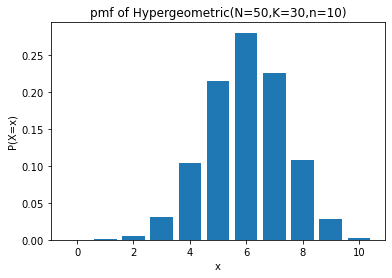

In [37]:
'''
超幾何分配(Hypergeometric Distribution)描述了
由有限個物件中抽出n個物件，成功抽出指定種類的物件的個數（不歸還 （without replacement）)
若隨機變量X 服從參數，則記為  H(n,K,N)，
𝑁 : 共有幾個物件, 𝑁 =0,1,…
𝐾 : 𝑁 個物件中，有 𝐾 個是你關心的物件類型個數, 𝐾 =0,1,2,…, 𝑁
𝑛 : K個物件，要抽出 𝑛 個物件, 𝑛 =0,1,…, 𝑁

現在有兩堆骰子，30個為紅色數字，20個為黑色數字，取出10個，X=有幾個是紅色的。
'''
# 1.定義超幾何分配的基本資訊
N=50
K=30
n=10

#產生一個同樣間隔的序列
r = np.arange(0, min(n+1,K+1)) #產出 x 對應點
print(r)

# 2.計算機率質量函數 (probability mass function)
# P(X=x) --> 是機率
probs = stats.hypergeom.pmf(r, N,K,n)
print(probs)
print(type(probs))

plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('pmf of Hypergeometric(N=50,K=30,n=10)')
plt.show()

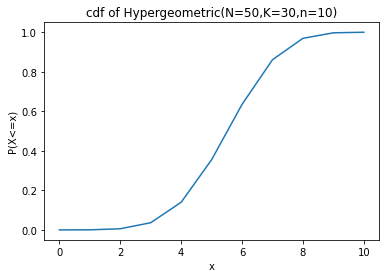

In [38]:
# 3.計算超幾何分配的累積機率 (cumulative density function)，pmf 的累加
# P(X=x) --> 是機率
cumsum_probs = stats.hypergeom.cdf(r, N,K,n)
plt.show()
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('cdf of Hypergeometric(N=50,K=30,n=10)')
plt.plot(r, cumsum_probs)
plt.show()

In [39]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
p_loc= stats.hypergeom.ppf(cumsum_probs, N,K,n)
print(p_loc)
#看上圖看結果

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


[7 5 8 8 7 4 9 8 8 6 6 8 7 8 7 6 6 9 6 5]


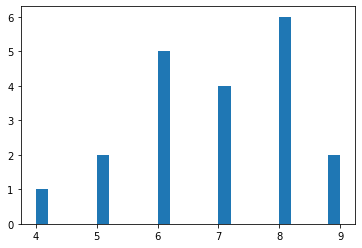

In [40]:
# 5.產生符合超幾何分配的隨機樣本點 (random sample)
X = stats.hypergeom.rvs(N,K,n,size=20)
print(X)
plt.hist(X,bins=25)
plt.show()
#試試看，，每一次的結果一樣嗎?

In [41]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。

stat_hyperg=stats.hypergeom.stats(N,K,n,moments='mvks')
print(stat_hyperg)
print(type(stat_hyperg))
#E(X)
print("negative hypergeom mean=",float(stat_hyperg[0]))
print("negative hypergeom variance=",float(stat_hyperg[1]))
print("negative hypergeom kurtosis=",float(stat_hyperg[2]))
print("negative hypergeom skew=",float(stat_hyperg[3]))


(array(6.), array(1.95918367), array(-0.08930431), array(-0.13162123))
<class 'tuple'>
negative hypergeom mean= 6.0
negative hypergeom variance= 1.9591836734693877
negative hypergeom kurtosis= -0.08930431353897003
negative hypergeom skew= -0.13162123226950354


### #投影片例子: 丟 5次骰子出現紅色三次的機率
![](Binomail_example.PNG)
![](data.PNG)


![](data.PNG)

In [42]:
# 用 python 計算
# 直接公式是運算
n=5
p=1/3
prob1=math.factorial(5)/math.factorial(2)/math.factorial(3)*pow(p,3)*pow((1-p),2) #page
print(prob1)

#P(X=3)
probs = stats.binom.pmf(3, n, p)
print(probs)
#兩者是相同的

0.1646090534979424
0.16460905349794233
